# Linear and Polynomial Regression with Boston Housing dataset


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Load the data

In [39]:
df = pd.read_csv("Data/BostonHousing.csv") 
df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [40]:
df.shape #333 filas y 15 columnas

(333, 15)

#### Histogram for the objective variable.

MEDV - Median value of owner-occupied homes in $1000's

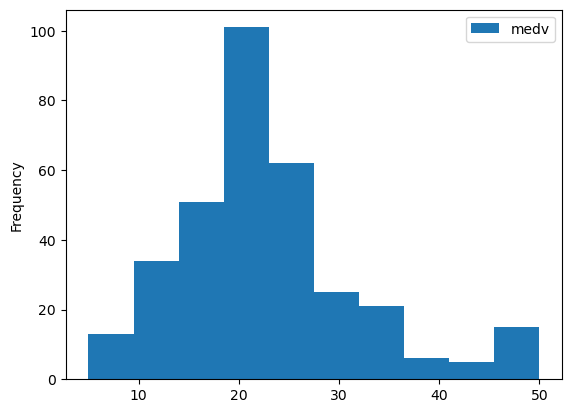

In [41]:
df[['medv']].plot.hist(bins=10)
plt.ylabel
plt.show()

Same histogram, now through distplot function from seaborn libray 

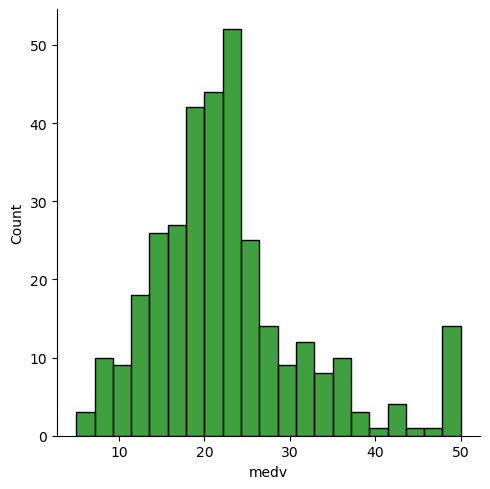

In [42]:
sns.displot(x=df["medv"], color="green")
plt.show()

Checking NaN values in the dataset 

In [43]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Scatter plot with the variables age, dis, lstat and rm against the target variable medv

With that, we can check if it has sense to make linear regression to those variables

In [44]:
df.head(1)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


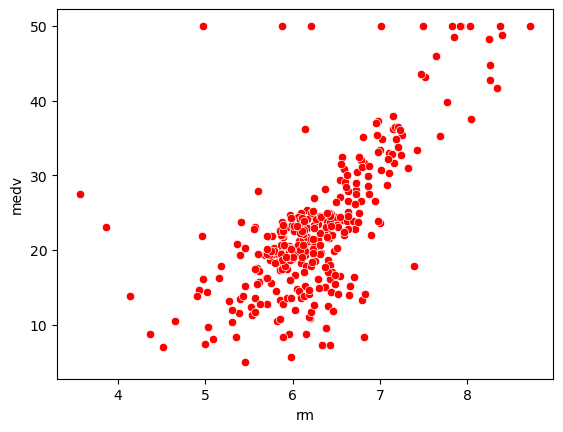

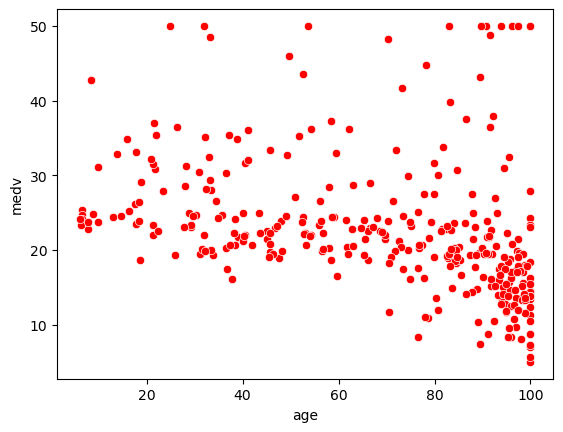

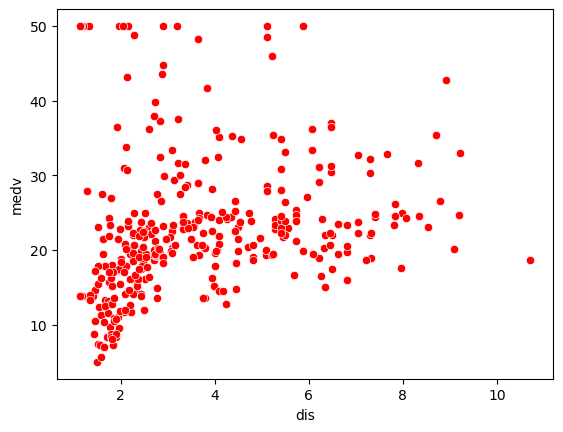

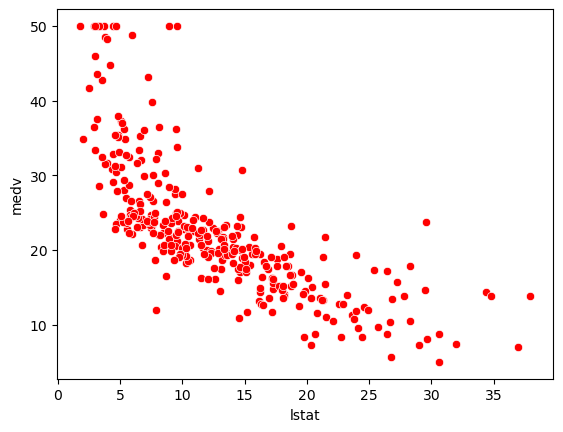

In [45]:
for i in df.columns[[6,7,8,13]]:
    sns.scatterplot(x = df[i] , y = df.medv, color="r")
    plt.show()

RM - average number of rooms per dwelling
Positive relationship, so it makes sense

AGE: proportion of owner-occupied units built before 1940
There seems to be a negative relationship, but it's quite weak. It makes sense; not all old houses have to be cheaper.

DIS: weighted distances to five employment centers in Boston
Positive relationship, although with some exceptions. It makes sense if we assume that houses further away from the city are more expensive, with some exceptions in the city center.

LSTAT - % lower status of the population
Negative relationship. The higher the proportion of low-income population, the lower the housing price.

We will estimate 4 different simple linear regressions, one for each of the 4 variables mentioned earlier. We will obtain the slope coefficient for each line and plot the fitted line along with the scatter plot.

We will check if the sign matches our interpretation and visualize which of the 4 models has the best MSE (Mean Squared Error) and which has the best R².

MSE:  44.00162841002105
R2:  0.4755455247485779


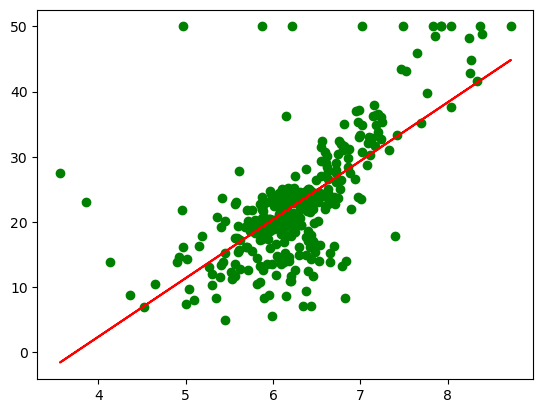

In [46]:
# rm Variable
rmmod = linear_model.LinearRegression() 
rmmod.fit(df[['rm']], df['medv']) #The xs must have a 2d array (1 col x n rows)
b1=rmmod.coef_
b0=rmmod.intercept_
yhat = b1*df.rm + b0 # This is the manual way yo get the predicted values

plt.plot(df.rm, df.medv, "og") # Real values
plt.plot(df.rm, yhat, "r")

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

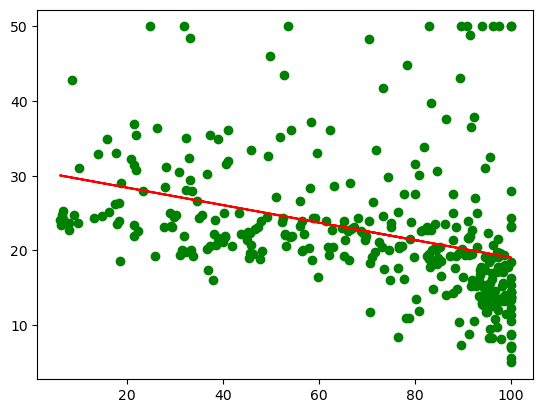

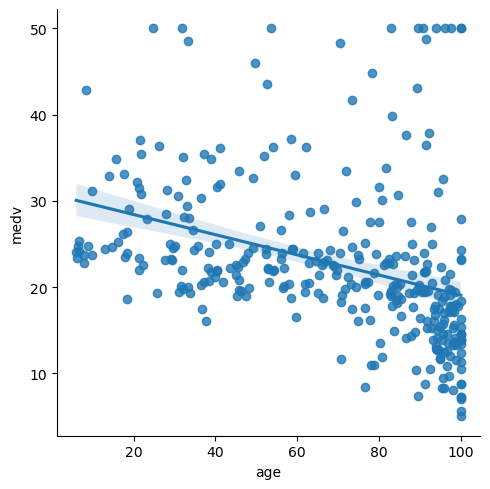

MSE:  73.0934439023321
R2:  0.12880079325913063


In [47]:
# Age Variable
agemod = linear_model.LinearRegression() 
agemod.fit(df[['age']], df['medv']) 
b1=agemod.coef_
b0=agemod.intercept_
#yhat = b1*df.age + b0 
yhat = agemod.predict(df[['age']])

plt.plot(df.age, df.medv, "og") 
plt.plot(df.age, yhat, "r")
plt.show()

sns.lmplot(x="age", y="medv", data=df) # Print also with seaborn
plt.show()

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

MSE:  78.68027533932558
R2:  0.06221146792090593


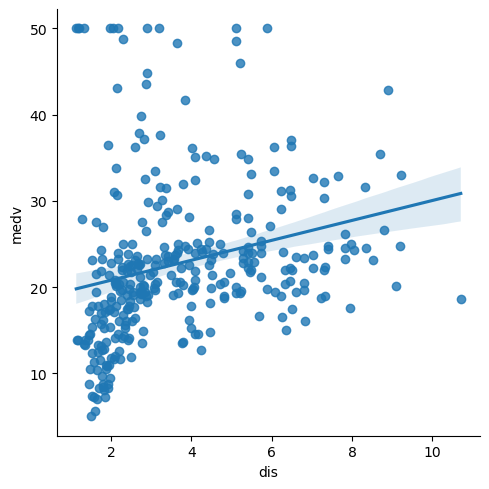

In [48]:
# Dis Variable
dismod = linear_model.LinearRegression() 
dismod.fit(df[['dis']], df['medv'])
b1=dismod.coef_
b0=dismod.intercept_
#yhat = b1*df.age + b0 
yhat = dismod.predict(df[['dis']])

sns.lmplot(x="dis", y="medv", data=df)

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

MSE:  38.12994358928325
R2:  0.5455300115227188


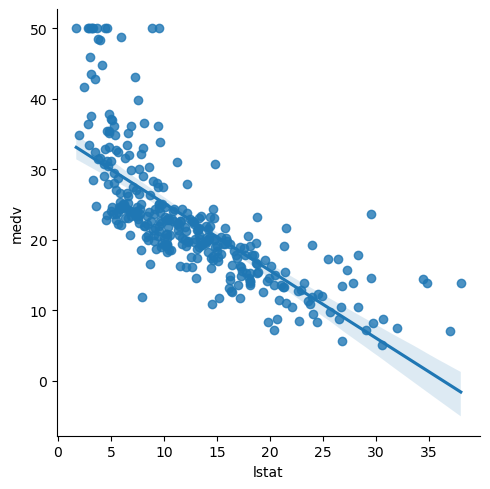

In [49]:
# Lstat Variable
lstatmod = linear_model.LinearRegression() 
lstatmod.fit(df[['lstat']], df['medv']) #las x tienen que ser arry 2d (1 columna x n filas)
b1=lstatmod.coef_
b0=lstatmod.intercept_
#yhat = b1*df.age + b0 
yhat = lstatmod.predict(df[['lstat']])

sns.lmplot(x="lstat", y="medv", data=df)

print('MSE: ',(mean_squared_error(df.medv, yhat)))
print('R2: ',(r2_score(df.medv, yhat)))

Lets create a multiple linear regresion with the variables lstat y rm.  
We can check if the coeficientes are the same sign (positive or negative). 
Also we can check if MSE or R2 improves  

In [50]:
X=df[['lstat','rm']]
y=df.medv

multimod=linear_model.LinearRegression()
multimod.fit(X,y)
print(multimod.coef_)
print('lstat: ',lstatmod.coef_)
print('rm: ',rmmod.coef_)
yhat = multimod.predict(X)
print('MSE: ',(mean_squared_error(y,yhat))) 
print('R2: ',(r2_score(y, yhat)))

[-0.65639414  4.92846523]
lstat:  [-0.9586494]
rm:  [8.98642214]
MSE:  30.67930894251715
R2:  0.6343339677660716


Let's plot the target variable against our prediction.

Also we can see our predictions for each variable.

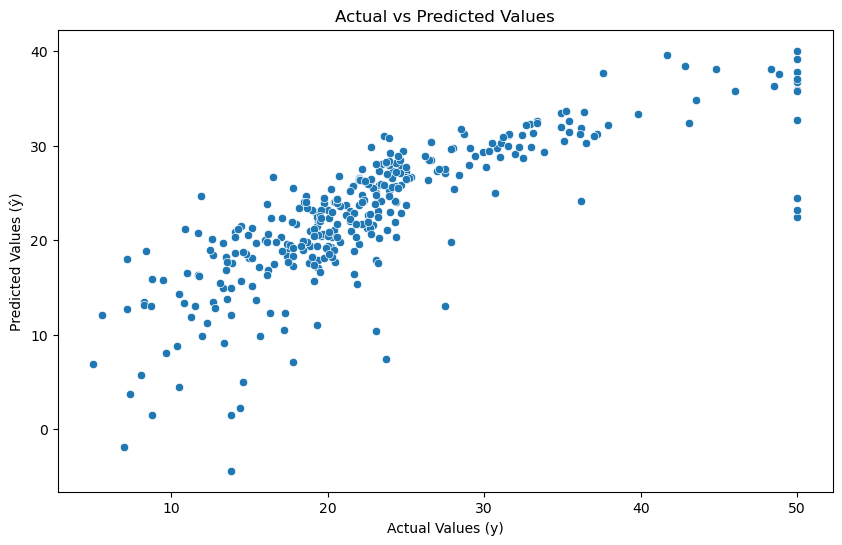

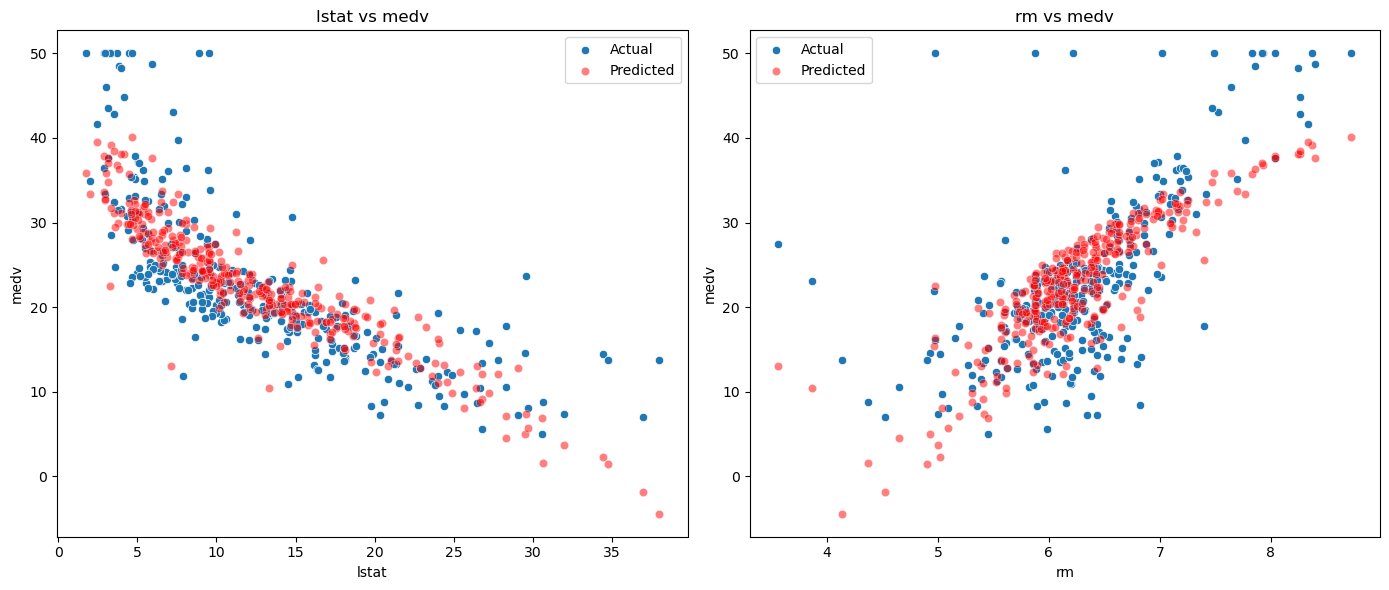

In [51]:
# Target variable against prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=yhat)
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (ŷ)')
plt.title('Actual vs Predicted Values')
plt.show()

# Each dependent variable against independent variable
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# lstat vs medv
sns.scatterplot(ax=axs[0], x=df['lstat'], y=y, label='Actual')
sns.scatterplot(ax=axs[0], x=df['lstat'], y=yhat, color='red', label='Predicted', alpha=0.5)
axs[0].set_title('lstat vs medv')
axs[0].set_xlabel('lstat')
axs[0].set_ylabel('medv')

# rm vs medv
sns.scatterplot(ax=axs[1], x=df['rm'], y=y, label='Actual')
sns.scatterplot(ax=axs[1], x=df['rm'], y=yhat, color='red', label='Predicted', alpha=0.5)
axs[1].set_title('rm vs medv')
axs[1].set_xlabel('rm')
axs[1].set_ylabel('medv')

plt.tight_layout()
plt.legend()
plt.show()


Let's do the same variables in the polinomial way. 

Coefficients: [ 0.00000000e+00 -6.96669565e-02 -2.38753894e+01  8.70014611e-03
 -1.58335199e-01  2.34496658e+00]
MSE (Polynomial): 19.245296359472526
R² (Polynomial): 0.7706157210998447


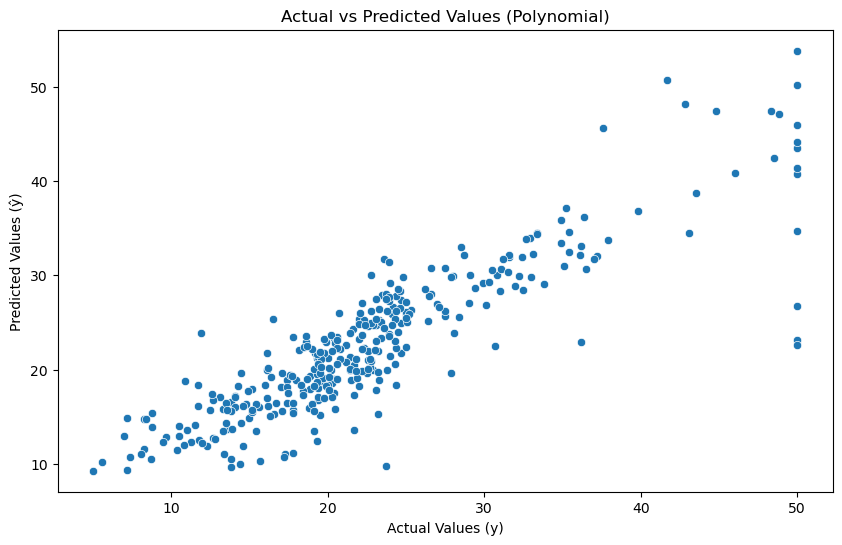

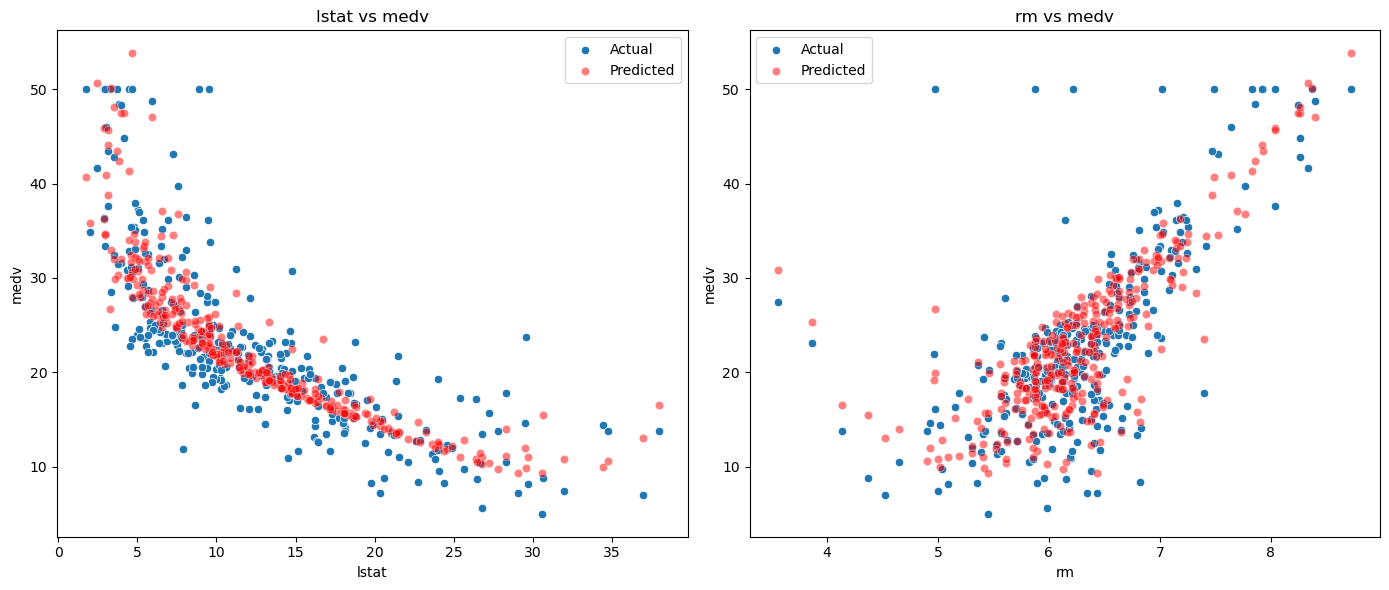

In [52]:
from sklearn.preprocessing import PolynomialFeatures


# Transform the independent variables to include polynomial terms of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model for the polynomial terms
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Pront the Coefficients
print(f"Coefficients: {poly_model.coef_}")

# Predict the values
yhat_poly = poly_model.predict(X_poly)

# MSE y R²
mse_poly = mean_squared_error(y, yhat_poly)
r2_poly = r2_score(y, yhat_poly)
print(f"MSE (Polynomial): {mse_poly}")
print(f"R² (Polynomial): {r2_poly}")

# Plot the target variable against our prediction
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=yhat_poly)
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (ŷ)')
plt.title('Actual vs Predicted Values (Polynomial)')
plt.show()

# Also we will plot each dependent variable against the independent or target variable
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# lstat vs medv
sns.scatterplot(ax=axs[0], x=df['lstat'], y=y, label='Actual')
sns.scatterplot(ax=axs[0], x=df['lstat'], y=yhat_poly, color='red', label='Predicted', alpha=0.5)
axs[0].set_title('lstat vs medv')
axs[0].set_xlabel('lstat')
axs[0].set_ylabel('medv')

# rm vs medv
sns.scatterplot(ax=axs[1], x=df['rm'], y=y, label='Actual')
sns.scatterplot(ax=axs[1], x=df['rm'], y=yhat_poly, color='red', label='Predicted', alpha=0.5)
axs[1].set_title('rm vs medv')
axs[1].set_xlabel('rm')
axs[1].set_ylabel('medv')

plt.tight_layout()
plt.legend()
plt.show()



We can check the differences